<a href="https://colab.research.google.com/github/Edi-Alves/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/Trabalho_pr%C3%A1tico_modulo_3_igti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRABALHO PRATICO MODULO 3 IGTI

O conjunto de dados IRIS talvez seja o mais clássico dos conjuntos de testes de algoritmos de classificação. Ele divide amostras de plantas em três espécies diferentes e tem, como features, a altura e largura de duas partes da planta: a sépala e as pétalas. Neste trabalho você deve classificar esse conjunto de dados com pelo menos dois algoritmos. Você deverá analisá-los segundo as métricas de qualidade que julgar relevantes, e utilizar técnicas de busca de hiperparâmetros e validação cruzada para tornar seus resultados mais robustos.

Fonte: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

Observação: gerar gráficos que expliquem e ilustrem o seu problema não é parte obrigatória da resolução do trabalho, mas é um treino bastante recomendado. Além disso, será necessário consultar a documentação do scikit-learn para fazer esse trabalho. Busque por “algoritmos de classificação” e pelos códigos mostrados durante as aulas interativas. Saber consultar documentações é uma habilidade importante de quem trabalha com Aprendizado de Máquina, e é isso que pretendemos desenvolver aqui!

IMPORTAÇÃO DOS PACOTES NECESSÁRIOS

In [0]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

CARREGAMENTO DO DATASET IRIS - Nota: O formato padrão deste dataset é um array

In [0]:
# Leitura do dataset
data = load_iris()

In [3]:
# Verificação das variaveis preditoras.
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Verificação das variável target
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# Valores da variável target
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
# Separando as variáveis preditoras da target. Nota: por padrão o dataset já é separado em X e Y
X = data.data[:, :2]  # Conforme documentação usaremos somente as 2 variáveis preditoras
y = data.target

In [0]:
# Split do dataset em treino e teste: 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Comprimento do dados de treino e teste
len(X_train), len(y_train), len(X_test), len(y_test)

(105, 105, 45, 45)

CRIAÇÃO DO MODELO COM KNN

In [0]:
# Treinamento do modelo
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
#Print das métricas
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.6222222222222222


KNN com utilização do GRIDSEARCHCV

In [0]:
# Definição dos parametros
params = {'n_neighbors': range(1,50), 
          'weights'    : ["uniform", "distance"],
          'leaf_size' : [30, 50, 60]}

In [12]:
# Treinamento do modelo com os parametros definidos
knn_g = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy')
knn_g.fit(X, y)
print (knn_g.best_params_)

{'leaf_size': 30, 'n_neighbors': 43, 'weights': 'uniform'}


In [13]:
# Predição com os novos parametros
y_pred_knn_otim = knn_g.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred_knn_otim)*100)
# print('Recall', recall(y_test, y_pred_knn_otim))
# print('Precision', precision_score(y_test, y_pred_knn_otim))

Acurácia: 86.66666666666667


CONSTRUÇÃO DA CONFUSION MATRIX

[[13  0  0]
 [ 0  8  2]
 [ 0  4 18]]


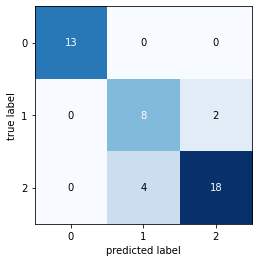

In [14]:

# Contrução da matriz de confusão
matrix_knn = confusion_matrix(y_test, y_pred_knn_otim)
print(matrix_knn)

# Realiza o plot da matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat = matrix_knn)
plt.show()

CRIAÇÃO DO MODELO COM RANDOM FOREST

In [0]:
# Treinamento do modelo

rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [16]:
#Print das métricas
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.6444444444444445


RANDOM FOREST COM UTILIZAÇÃO DO GRIDSEARCHCV

In [0]:
# Definição dos parametros
params = {'n_estimators': [100, 300, 500, 100],
          'min_samples_leaf': [3, 4, 8],
          'max_depth': [2, 3, 5, 8]}
   

In [18]:
# Treinamento com os novos parametros
rf_g = GridSearchCV(RandomForestClassifier(), params, cv=10, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
print(rf_g.best_params_)

{'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 500}


In [0]:
# Previsão
y_pred_rf_otim = rf_g.predict(X_test)

In [20]:
# Print das acurácia com os novos parametros
print("Acurácia:",metrics.accuracy_score(y_test, y_pred_rf_otim)*100)

Acurácia: 71.11111111111111


[[12  1  0]
 [ 0  7  3]
 [ 0  9 13]]


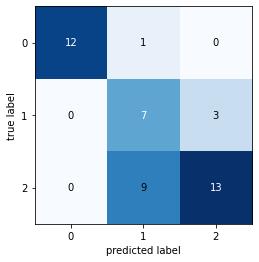

In [21]:
# Contrução da matriz de confusão
matrix_rf = confusion_matrix(y_test, y_pred_rf_otim)
print(matrix_rf)

# Realiza o plot da matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat = matrix_rf)
plt.show()

FIM

In [0]:
# Transformando as características da coluna species para tipo numerico.
# iris['species_num'] = pd.factorize(iris['species'])[0] +1